# Logistic Regression

Logistic regression is the classification algorithm for categorical variable.<br>
Logistic Regression Applocations :-
1. Predicting the probability of a person having a heart attack.
2. Predicting the mortality in injured patients.
3. Predicting a customer's propernsity to purchase a product or halt a subscription.
4. Predicting the probability of failure of a given process or product.
5. Predicting the likelihood of a homeowner defaulting on a mortgage.
* Logistic regression is suitable when data is binary, need probabilistic results, need a linear decision boundary, need to understand the impact of a feature.

### Logistic Function
$$\sigma(\theta^T X) = \frac{1}{1 + e^{-\theta^T X}} = P(y=1|x) = 1 - P(y=0|x)$$
### Training Process
1. Initialize $\theta$.
2. Calculate $\hat y = \sigma(\theta^T X)$ for a customer.
3. Compare the output of $\hat y$ with actual output of customer y and record all its error.
4. Calculate all error for all customers.
5. Change the $\theta$ to reduce cost.
6. Go back to step 2.

### Cost Function :-
$$cost(\hat y, y) = \frac{1}{2}(\sigma(\theta^T X) - y)$$
$$ J(\theta) = \frac{1}{m}\sum_{i-1}^{m}cost(\hat y, y)$$
$$ J(\theta) = \frac{1}{m}\sum_{i-1}^{m} y^i log(\hat y^i) + (1-y^i)log(1-\hat y^i)$$

Gradient Descent :- A technique to use the derivative of a cost function to change the parameter values, in order to minimize the cost.<br>
$$\frac{\partial J}{\partial \theta_{1}} = -\frac{1}{m}\sum_{i=1}^{m}(y^i - \hat y^i)x_{1}^i $$
$$\nabla J = \begin{bmatrix} \frac{\partial J}{\partial \theta_{1}} \\ \frac{\partial J}{\partial \theta_{2}} \\ .... \\ .... \\ \frac{\partial J}{\partial \theta_{k}}\end{bmatrix}$$
$$ \theta_{new} = \theta_{theta} - \eta\nabla J$$

### Algorithm
1. Initialize the parameters randomly.
2. Feed the cost function with training set, and calculate error.
3. Calculate the gradient of cost fucntion.
4. Update weights with new values
5. Go to step-2 until cost is small enough
6. Predict the customer.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
data = pd.read_csv("ChurnData.csv")

In [3]:
data = data[["tenure", "age", "address", "income", "ed", "employ", "equip", "callcard", "wireless", "churn"]]
data["churn"] = data["churn"].astype("int")

In [4]:
X = np.asarray(data[["tenure", "age", "address", "income", "ed", "employ", "equip"]])
Y = np.asarray(data["churn"])

In [5]:
X = preprocessing.StandardScaler().fit(X).transform(X)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)
print("Train data size : {} {}".format(X_train.shape, Y_train.shape))
print("Test data size : {} {}".format(X_test.shape, Y_test.shape))

Train data size : (160, 7) (160,)
Test data size : (40, 7) (40,)


In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
LR = LogisticRegression(C=0.01, solver="liblinear").fit(X_train, Y_train)

In [9]:
y_hat = LR.predict(X_test)

In [10]:
y_hat_prob = LR.predict_proba(X_test)

In [11]:
from sklearn.metrics import jaccard_score

In [12]:
print("Jaccard Score : {}".format(jaccard_score(Y_test, y_hat, pos_label = 0)))

Jaccard Score : 0.7058823529411765


In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [14]:
def plot_confusion_matrix(cm, classes, normalize=False, title = "Confusion Matrix", cmap = plt.cm.Blues):
    if normalize :
        cm = cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized Confusion Matrix")
    else :
        print("Confusion matrix, without normalization")
    print(cm)
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = ".2f" if normalize else "d"
    tresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = "center", color = "white" if cm[i, j] > tresh else "black")
    plt.tight_layout()
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

Normalized Confusion Matrix
[[0.4  0.6 ]
 [0.04 0.96]]


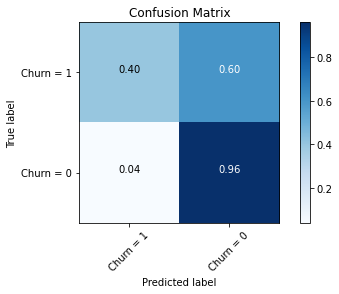

In [15]:
cnf_matrix = confusion_matrix(Y_test, y_hat, labels=[1,0])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ["Churn = 1","Churn = 0"], normalize = "False", title = "Confusion Matrix")

In [16]:
print(classification_report(Y_test, y_hat))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



In [17]:
from sklearn.metrics import log_loss
print("Log loss: {}".format(log_loss(Y_test, y_hat)))

Log loss: 8.634714088663426
